# Data Cleaning in Python

Data cleaning or cleansing is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

There are mainly four types of things we need to focus on when cleaning Data:

https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

## FOUR TYPES
1. Missing Data

2. Irregular Data (Outliers)

3. Unnecessary Data — Repetitive Data, Duplicates and more

4. Inconsistent Data — Capitalization, Addresses and more

## Summary of Techiniques and Solutions

### 1. Missing Data

####  search technique:
   a. Missing Data Heatmap
   
   b. Missing Data Percentage List
   
   c. Missing Data Histogram
   
####  solutions:
   a. drop the observations
   
   b. drop the feature
   
   c. Impute the missing
   
   d. replace the missing
   
   
### 2. Irregular Data (Outliers)
####  search technique:
   a. Histogram/ Box plot
   
   b. Descriptive Statistics
   
   c. Bar chart
   
   d. other techiques: scatter plot, Z-score, clustering
   
####  solutions:
     simlar to missing data, either drop or keep them.


### 3. Unnecessary Data — Repetitive Data, Duplicates and more
####  search technique -> Solutions
     a. Unnecessary type 1: Uniformative/ Repetitive -> We need to understand the reasons behind the repetitive feature. When they are genuinely uninformative, we can toss them out.
     
     b. Unnecessary type 2: Irrelevant -> When the features are not serving the project’s goal, we can remove them.
     
     c. Unnecessary type 3: Duplicates: a. all feature based
                                        b. key features based


### 4. Inconsistent Data — Capitalization, Addresses and more
 
   a. Inconsistent type 1: Capitalization (Inconsistent usage of upper and lower cases)
   
   b. Inconsistent type 2: Formats (e.g., DateTime format)
   
   c. Inconsistent type 3: Categorical Values

   d. Inconsistent type 4: Addresses
   


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data 

In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# read the data
df = pd.read_csv('macro.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

(2484, 100)
timestamp                       object
oil_urals                      float64
gdp_quart                      float64
gdp_quart_growth               float64
cpi                            float64
                                ...   
bandwidth_sports               float64
population_reg_sports_share    float64
students_reg_sports_share      float64
apartment_build                float64
apartment_fund_sqm             float64
Length: 100, dtype: object


# 1. Missing Values

If exists missing values, we can delete the corresponding row/ column

OR 

Replace it by:
1. constent
2. mean/median
3. the last/next one

##  How to find out Missing Values?

### Technique 1: Missing Data Heatmap

When there is a smaller number of features, we can visualize the missing data via heatmap.

<AxesSubplot:>

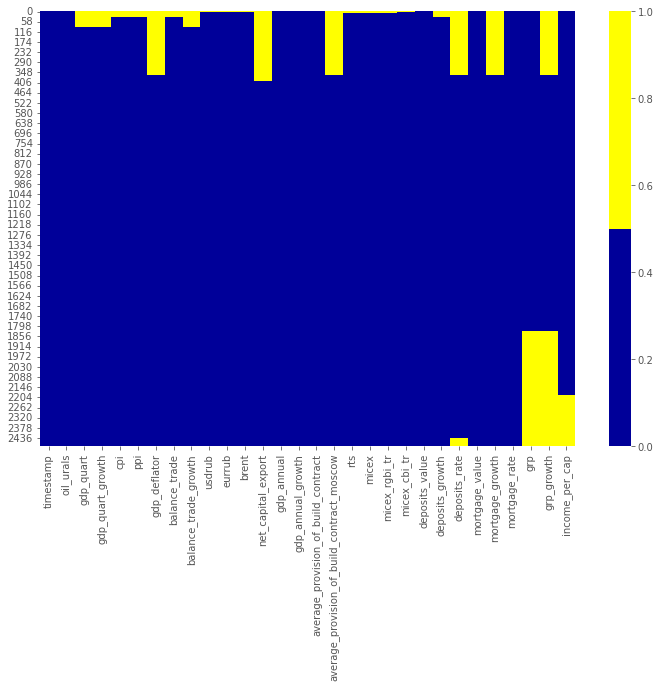

In [3]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

### Technique 2: Missing Data Percentage List

When there are many features in the dataset, we can make a list of missing data % for each feature

In [4]:
# if it's a larger dataset and the visualization takes too long can do this.
# we can calculate the % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

timestamp - 0%
oil_urals - 0%
gdp_quart - 4%
gdp_quart_growth - 4%
cpi - 1%
ppi - 1%
gdp_deflator - 15%
balance_trade - 1%
balance_trade_growth - 4%
usdrub - 0%
eurrub - 0%
brent - 0%
net_capital_export - 16%
gdp_annual - 0%
gdp_annual_growth - 0%
average_provision_of_build_contract - 0%
average_provision_of_build_contract_moscow - 15%
rts - 0%
micex - 0%
micex_rgbi_tr - 0%
micex_cbi_tr - 0%
deposits_value - 0%
deposits_growth - 1%
deposits_rate - 17%
mortgage_value - 0%
mortgage_growth - 15%
mortgage_rate - 0%
grp - 26%
grp_growth - 41%
income_per_cap - 12%
real_dispos_income_per_cap_growth - 26%
salary - 12%
salary_growth - 26%
fixed_basket - 0%
retail_trade_turnover - 12%
retail_trade_turnover_per_cap - 12%
retail_trade_turnover_growth - 12%
labor_force - 12%
unemployment - 12%
employment - 12%
invest_fixed_capital_per_cap - 12%
invest_fixed_assets - 12%
profitable_enterpr_share - 26%
unprofitable_enterpr_share - 26%
share_own_revenues - 26%
overdue_wages_per_cap - 26%
fin_res_per_c

### Technique 3: Missing Data Histogram

created missing indicator for: gdp_quart
created missing indicator for: gdp_quart_growth
created missing indicator for: cpi
created missing indicator for: ppi
created missing indicator for: gdp_deflator
created missing indicator for: balance_trade
created missing indicator for: balance_trade_growth
created missing indicator for: usdrub
created missing indicator for: eurrub
created missing indicator for: brent
created missing indicator for: net_capital_export
created missing indicator for: average_provision_of_build_contract_moscow
created missing indicator for: rts
created missing indicator for: micex
created missing indicator for: micex_rgbi_tr
created missing indicator for: micex_cbi_tr
created missing indicator for: deposits_growth
created missing indicator for: deposits_rate
created missing indicator for: mortgage_growth
created missing indicator for: grp
created missing indicator for: grp_growth
created missing indicator for: income_per_cap
created missing indicator for: real_disp

<AxesSubplot:xlabel='index'>

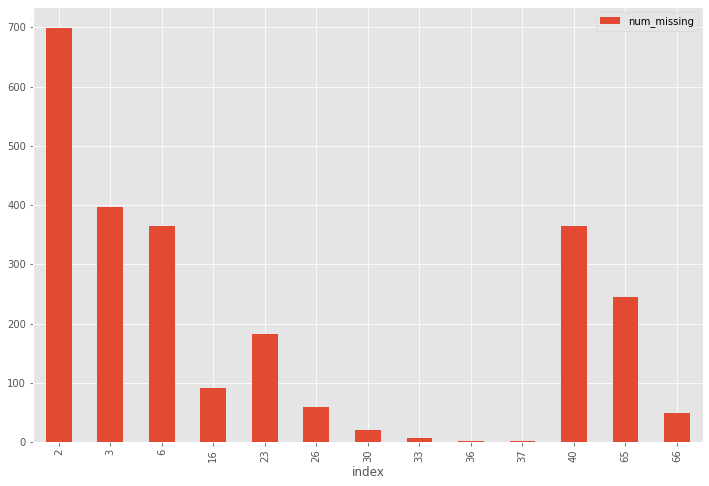

In [20]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


## Solution

### a. Approach 1: Drop the Observation

In [21]:
# drop rows with a lot of missing values.
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

### b. Approach 2: Drop the Feature

In [24]:
# hospital_beds_raion has a lot of missing.
# If we want to drop.
cols_to_drop = ['real_dispos_income_per_cap_growth']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

In [25]:
np.sum(df.isnull(),axis = 0)  # check the number of missing values, axis = 0 along the row, axis = 1 along the column

timestamp                                 0
oil_urals                                 0
gdp_quart                                90
gdp_quart_growth                         90
cpi                                      31
                                         ..
population_reg_sports_share_ismissing     0
students_reg_sports_share_ismissing       0
apartment_build_ismissing                 0
apartment_fund_sqm_ismissing              0
num_missing                               0
Length: 192, dtype: int64

In [26]:
df.apply(lambda x: sum(x.isnull())/len(x), axis =0) # calculate the missing percentage

timestamp                                0.000000
oil_urals                                0.000000
gdp_quart                                0.036232
gdp_quart_growth                         0.036232
cpi                                      0.012480
                                           ...   
population_reg_sports_share_ismissing    0.000000
students_reg_sports_share_ismissing      0.000000
apartment_build_ismissing                0.000000
apartment_fund_sqm_ismissing             0.000000
num_missing                              0.000000
Length: 192, dtype: float64

In [27]:
df.dropna() # delete all rows that include the missing values

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,turnover_catering_per_cap_ismissing,theaters_viewers_per_1000_cap_ismissing,seats_theather_rfmin_per_100000_cap_ismissing,museum_visitis_per_100_cap_ismissing,bandwidth_sports_ismissing,population_reg_sports_share_ismissing,students_reg_sports_share_ismissing,apartment_build_ismissing,apartment_fund_sqm_ismissing,num_missing


In [28]:
df.dropna(how='any',axis = 0) # if a row includes any null, delete the row (axis = 1 delete the column)
df.dropna(how='all',axis = 0) # if the information in a row is all null, delete the row 

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,turnover_catering_per_cap_ismissing,theaters_viewers_per_1000_cap_ismissing,seats_theather_rfmin_per_100000_cap_ismissing,museum_visitis_per_100_cap_ismissing,bandwidth_sports_ismissing,population_reg_sports_share_ismissing,students_reg_sports_share_ismissing,apartment_build_ismissing,apartment_fund_sqm_ismissing,num_missing
0,2010-01-01,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,37
1,2010-01-02,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,36
2,2010-01-03,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,36
3,2010-01-04,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9050,...,False,False,False,False,True,True,False,False,True,33
4,2010-01-05,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8360,...,False,False,False,False,True,True,False,False,True,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2016-10-15,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,True,True,True,True,True,True,True,True,True,66
2480,2016-10-16,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,True,True,True,True,True,True,True,True,True,66
2481,2016-10-17,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,63.0856,...,True,True,True,True,True,True,True,True,True,66
2482,2016-10-18,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,...,True,True,True,True,True,True,True,True,True,66


In [31]:
df.dropna(subset=['oil_urals','gdp_quart'],how='any',axis = 0) # if any value in this two columns is missing, delete the row

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,turnover_catering_per_cap_ismissing,theaters_viewers_per_1000_cap_ismissing,seats_theather_rfmin_per_100000_cap_ismissing,museum_visitis_per_100_cap_ismissing,bandwidth_sports_ismissing,population_reg_sports_share_ismissing,students_reg_sports_share_ismissing,apartment_build_ismissing,apartment_fund_sqm_ismissing,num_missing
90,2010-04-01,82.8700,9995.8,4.1,319.8,350.2,NaN,16.604,14.1,29.2700,...,False,False,False,False,True,True,False,False,True,23
91,2010-04-02,82.8700,9995.8,4.1,319.8,350.2,NaN,16.604,14.1,29.2700,...,False,False,False,False,True,True,False,False,True,23
92,2010-04-03,82.8700,9995.8,4.1,319.8,350.2,NaN,16.604,14.1,29.2700,...,False,False,False,False,True,True,False,False,True,23
93,2010-04-04,82.8700,9995.8,4.1,319.8,350.2,NaN,16.604,14.1,29.2700,...,False,False,False,False,True,True,False,False,True,23
94,2010-04-05,82.8700,9995.8,4.1,319.8,350.2,NaN,16.604,14.1,29.1888,...,False,False,False,False,True,True,False,False,True,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2016-10-15,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,True,True,True,True,True,True,True,True,True,66
2480,2016-10-16,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,True,True,True,True,True,True,True,True,True,66
2481,2016-10-17,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,63.0856,...,True,True,True,True,True,True,True,True,True,66
2482,2016-10-18,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,...,True,True,True,True,True,True,True,True,True,66


### c. Approach 3 : Impute the Missing

In [33]:
# replace missing values with the median.
med = df['gdp_deflator'].median()
print(med)
df['gdp_deflator'] = df['gdp_deflator'].fillna(med)
view raw

SyntaxError: invalid syntax (3697519891.py, line 5)

In [34]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: gdp_quart
imputing missing values for: gdp_quart_growth
imputing missing values for: cpi
imputing missing values for: ppi
imputing missing values for: gdp_deflator
imputing missing values for: balance_trade
imputing missing values for: balance_trade_growth
imputing missing values for: usdrub
imputing missing values for: eurrub
imputing missing values for: brent
imputing missing values for: net_capital_export
imputing missing values for: average_provision_of_build_contract_moscow
imputing missing values for: rts
imputing missing values for: micex
imputing missing values for: micex_rgbi_tr
imputing missing values for: micex_cbi_tr
imputing missing values for: deposits_growth
imputing missing values for: deposits_rate
imputing missing values for: mortgage_growth
imputing missing values for: grp
imputing missing values for: grp_growth
imputing missing values for: income_per_cap
imputing missing values for: real_dispos_income_per_cap_growth
imputing missing valu

In [ ]:
df.a.fillna(df.a.median()) # replace the missing values through the median

### d. Approach 4: Replace the Missing

In [38]:
df['apartment_fund_sqm'] = df['apartment_fund_sqm'].fillna('_MISSING_')


# numeric
df['theaters_viewers_per_1000_cap'] = df['theaters_viewers_per_1000_cap'].fillna(-999)

In [ ]:
df.a.fillna(20) # replace by a content 20

In [ ]:
df.fillna(value={'gender': df.gender.mode()[0],'age':df.age.mean(),'income': df.incom.median()})
# replace different columns according to different standards

In [ ]:
df.fillna(method = 'ffill') # replaced by the forward one
df.fillna(method='bfill') # replaced by the backward one 

In [ ]:
df.a.interpolate(method='linear') # replaced by the linear difference
df.a.interpolate(method='polynomial'.order = 1)

# 2. Irregular Data (Outliers)

## How to find out?

## Technique 1: Histogram/Box Plot

<AxesSubplot:>

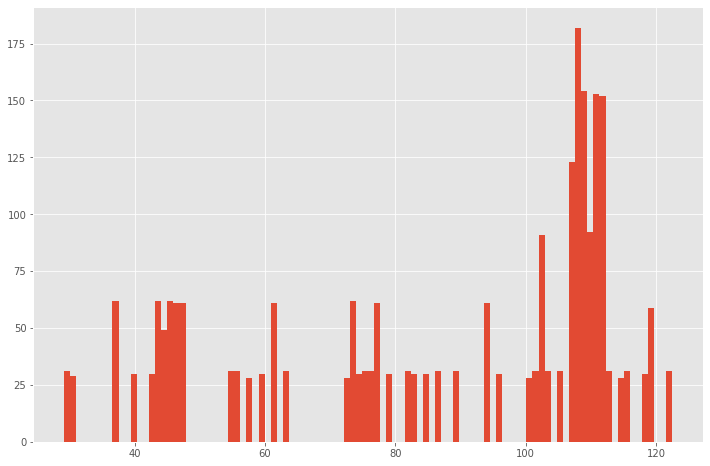

In [8]:
# histogram of life_sq.
df['oil_urals'].hist(bins=100)

<AxesSubplot:>

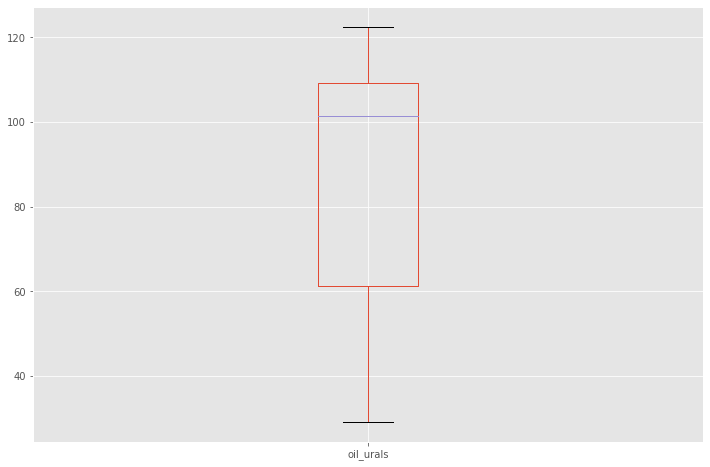

In [7]:
# box plot.
df.boxplot(column=['oil_urals'])

## Technique 2: Descriptive Statistics

In [9]:
df['oil_urals'].describe()

count    2484.000000
mean       86.467157
std        27.528709
min        29.112500
25%        61.283300
50%       101.416500
75%       109.310000
max       122.520000
Name: oil_urals, dtype: float64

In [ ]:
# first we need to determine the range of outliers. usually: [Q1-1.5(Q3-Q1), Q3 +1.5(Q3-Q1) ], IQR = Q3-Q1
# OR > mean + 2std , < mean-2std
# plot: boxplot, scatterplot, histogram

replace_value = a.counts[a.counts< UL].max()  # calculate the replace value
a.loc [a.counts > UL, 'counts'] = replace_value # replace all outliers through the one defined above

## Technique 3: Bar Chart

<AxesSubplot:>

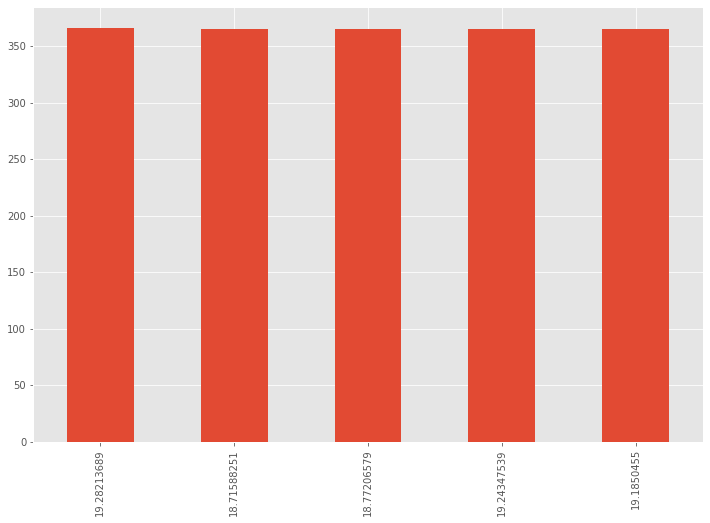

In [10]:
# bar chart -  distribution of a categorical variable
df['lodging_sqm_per_cap'].value_counts().plot.bar()

In [ ]:
P1 = a.counts.quartile(0.01) # quartile 1%
P00 = a.counts.quartile(0.99)

a['counts_new'] = a['counts']
a.loc[a['counts'] > P99,'counts_new']= p99
a.loc[a['counts'] < P1,'counts_new']= p1

## What to do?
While outliers are not hard to detect, we have to determine the right solutions to handle them. It highly depends on the dataset and the goal of the project.
The methods of handling outliers are somewhat similar to missing data. We either drop or adjust or keep them. We can refer back to the missing data section for possible solutions.

# 3. Unnecessary Data — Duplicated Data

## Unnecessary type 1: Uninformative / Repetitive

### How to find out?

We can create a list of features with a high percentage of the same value.
For example, we specify below to show features with over 95% rows being the same value.

In [12]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

### What to do?
We need to understand the reasons behind the repetitive feature. When they are genuinely uninformative, we can toss them out.

## Unnecessary type 2: Irrelevant
Again, the data needs to provide valuable information for the project. If the features are not related to the question we are trying to solve in the project, they are irrelevant.

### How to find out?
We need to skim through the features to identify irrelevant ones.
For example, a feature recording the temperature in Toronto doesn’t provide any useful insights to predict Russian housing prices.
### What to do?
When the features are not serving the project’s goal, we can remove them.

## Unnecessary type 3: Duplicates

### How to find out?

This duplicate happens when all the features’ values within the observations are the same. It is easy to find.

We first remove the unique identifier id in the dataset. Then we create a dataset called df_dedupped by dropping the duplicates. We compare the shapes of the two datasets (df and df_dedupped) to find out the number of duplicated rows.

### Duplicates type 1: All Features based

In [ ]:
# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

### Duplicates type 2: Key Features based


### How to find out?
Sometimes it is better to remove duplicate data based on a set of unique identifiers.

In [ ]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

### What to do?
We can drop these duplicates based on the key features.

In [ ]:
# drop duplicates based on an subset of variables.

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

# 4. Inconsistent Data — Capitalization, Addresses and more

It is also crucial to have the dataset follow specific standards to fit a model. We need to explore the data in different ways to find out the inconsistent data. Much of the time, it depends on observations and experience. There is no set code to run and fix them all.

## Inconsistent type 1: Capitalization
Inconsistent usage of upper and lower cases in categorical values is a common mistake. It could cause issues since analyses in Python is case sensitive.

### How to find out?
Let’s look at the sub_area feature.

In [ ]:
df['sub_area'].value_counts(dropna=False)

### What to do?
To avoid this, we can put all letters to lower cases (or upper cases).


In [ ]:
# make everything lower case.
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

## Inconsistent type 2: Formats
Another standardization we need to perform is the data formats. One example is to convert the feature from string to DateTime format.

### How to find out?
The feature timestamp is in string format while it represents dates.

In [ ]:
string_to_datetime1.py

### What to do?
We can convert it and extract the date or time values by using the code below. After this, it’s easier to analyze the transaction volume group by either year or month.

In [ ]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

## Inconsistent type 3: Categorical Values
Inconsistent categorical values are the last inconsistent type we cover. A categorical feature has a limited number of values. Sometimes there may be other values due to reasons such as typos.

### How to find out?
We need to observe the feature to find out this inconsistency. Let’s show this with an example.

In [ ]:
from nltk.metrics import edit_distance

df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})


df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

### What to do?
We can set criteria to convert these typos to the correct values. For example, the below code sets all the values within 2 letters distance from “toronto” to be “toronto”.


In [ ]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

## Inconsistent type 4: Addresses
The address feature could be a headache for many of us. Because people entering the data into the database often don’t follow a standard format.

### How to find out?
We can find messy address data by looking at it. Even though sometimes we can’t spot any issues, we can still run code to standardize them.

In [ ]:
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

### What to do?
We run the below code to lowercase the letters, remove white space, delete periods and standardize wordings.


In [ ]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespace.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '') # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave') # replace apartment with apt.

df_add_ex

# Visulisation - Matplotlib

In [4]:
import matplotlib.pyplot as plt
import numpy as np

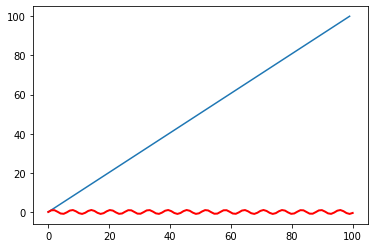

In [6]:
x=np.linspace(0,100,100)
y=np.sin(x)
plt.plot(x)
plt.plot(x,y,c='red',lw=2,ls='-') #ls for line style

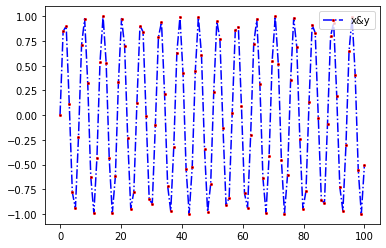

In [13]:
plt.plot(x,y,ls='-.',marker='o', markersize = 2,c='blue',\
         markeredgecolor='red',markerfacecolor='black',label='x&y')
plt.legend(loc='upper right')
plt.show()

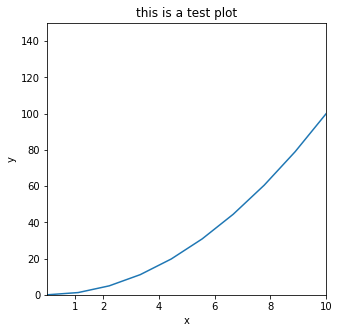

In [20]:
x=np.linspace(0,10,10)
y = x**2
plt.figure(figsize=(5,5))
plt.title('this is a test plot')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,10)
plt.ylim(0,150)
plt.xticks([1,2,4,6,8,10])
plt.plot(x,y)
plt.show()

# pie chart

In [ ]:
explode=[0,0.1,0,0.1]
colors='red','blue','yellow','green']

In [ ]:
plt.pie(x=x_data,explode = explode,labels=y_ldata,colors=colors,\
        wedgerops={'linewidth'=1.5,'egecolor':'green',\
                  textprops={'frontsize':10,color:'black'}}
plt.title('title',pad=30)
plt.show()

# Descriptive Statistics

# Hypothesis Testing

one sample t test

In [61]:
!pip3 install statsmodels 
import scipy.stats as stats
import numpy as np


In [63]:
x = np.array( [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14])
stats.ttest_1samp(a=x, popmean=15)

Ttest_1sampResult(statistic=-1.6848470783484626, pvalue=0.12014460742498101)

two sample t test

In [64]:
x = np.array( [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14,66,22,23,14,34,11,8,4,8,13,44])
y = np.array([ 23,14,34,11,8,4,8,13,44,77,33,55,14, 14, 16, 13, 12, 17, 15])


# First Use Levene Test to check whether these two sampels have equal variance

leveneTestRes=stats.levene(x,y)  #  use Levene's test to test if 2 samples have equal variances
print(leveneTestRes)            # if p<= 0.05, reject H0, and say the variances are significantly differnt
                                # here, pvalue=0.3124352504445546 >0.05, which means the two samples have equal variance
    


LeveneResult(statistic=1.0466164714051889, pvalue=0.3124352504445546)


In [29]:
# based on the resuls above, determine whether equal_var = True or False
stats.stats.ttest_ind(x,y,equal_var=True)
# pvalue=0.40687861242043444> 0.05. Thus there is no siginficant differences between the means of these two samples

Ttest_indResult(statistic=-0.8382373815003099, pvalue=0.40687861242043444)

# Contingency Table in Python

In [55]:
import numpy as np
import pandas as pd
import matplotlib as plt

data = pd.read_csv("/Users/yikaima/Desktop/Python_Jupyter/loan_status.csv")
print (data.head())

  grade sub_grade  loan_status         purpose
0     B        B2   Fully Paid     credit_card
1     C        C4  Charged Off             car
2     C        C5   Fully Paid  small_business
3     C        C1   Fully Paid           other
4     B        B5   Fully Paid           other


In [58]:
# Contingency Table showing correlation between Grades and loan status.
data_crosstab = pd.crosstab(data['grade'],
                            data['loan_status'], 
                               margins = False)
print(data_crosstab)

loan_status  Charged Off  Fully Paid
grade                               
A                      1          11
B                      5          16
C                      3           8
D                      1           3
E                      0           1
F                      1           0


# Chi-Square

A: χ2 test of Independence (The Pearson’s Chi-Square Test)

The aim of the test is to conclude whether the two variables( gender and choice of pet ) are related to each other.


In [60]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    


0.1031971404730939
p value is 0.1031971404730939
Independent (H0 holds true)


B: χ2 Goodness-Of-Fit Test
    
It is used to make the inference about the distribution of a variable.
H₀: The variable has the specified distribution, normal
H₁: The variable does not have the specified distribution, not normal